In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path = '/content/drive/MyDrive/Maitri/model_vgg_nineteen.keras'

In [ ]:
# Load the model
model = load_model(model_path)

In [ ]:
# Check the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Bat  (None, 25088)             100352    
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 2048)              51382272  
                                                             

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

Dataset URL: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images
License(s): ODbL-1.0
alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/alzheimers-dataset-4-class-of-images.zip

Archive:  /content/alzheimers-dataset-4-class-of-images.zip
replace Alzheimer_s Dataset/test/MildDemented/26 (19).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Alzheimer_s Dataset/test/MildDemented/26 (19).jpg  
replace Alzheimer_s Dataset/test/MildDemented/26 (20).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_s Dataset/test/MildDemented/26 (21).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_s Dataset/test/MildDemented/26 (22).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_s Dataset/test/MildDemented/26 (23).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_datagen  = ImageDataGenerator(rescale = 1./255)
test_dataset  = test_datagen.flow_from_directory(directory = '/content/Alzheimer_s Dataset/test',
                                                 target_size = (224,224),                                          class_mode = 'categorical',
                                                 batch_size = 2500)

Found 1279 images belonging to 4 classes.


In [ ]:
X_test,y_test = next(test_dataset)

In [ ]:
score, acc = model.evaluate(X_test,y_test)

40/40 [==============================] - 28s 673ms/step - loss: 1.1272 - accuracy: 0.7209


In [ ]:
print('Test Loss =', score)
print('Test Accuracy =', acc)

Test Loss = 1.1272032260894775
Test Accuracy = 0.7208756804466248


In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
y_test_ = np.argmax(y_test,axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

40/40 [==============================] - 6s 149ms/step


,Actual,Prediction
0,2,2
1,3,3
2,3,2
3,2,2
4,3,3
...,...,...
1274,2,2
1275,3,3
1276,2,3
1277,0,3


In [ ]:
!pip install shap

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Bat  (None, 25088)             100352    
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 2048)              51382272  
                                                             

In [ ]:
X_test_size = X_test.shape
print(X_test_size)

(1279, 224, 224, 3)


In [ ]:
class_names = test_dataset.class_indices
class_names

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
def f(x):
  tmp = x.copy()
  preprocess_input(tmp)
  return model(tmp)

In [ ]:
! pip install shap
import shap
masker = shap.maskers.Image("inpaint_telea",(224,224,3))

In [ ]:
explainer = shap.Explainer(f, masker, output_names=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

shap_values = explainer(X_test[0:4], max_evals=1000, batch_size=50, outputs= shap.Explanation.argsort.flip[:4])


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer:  75%|███████▌  | 3/4 [02:05<00:31, 31.23s/it]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 4/4 [03:07<00:00, 44.25s/it]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [04:10, 62.59s/it]


In [ ]:
shap_values.shape

(4, 224, 224, 3, 4)

In [ ]:
np.tile(np.array(shap_values.output_names),1)

array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')

In [ ]:

np.array(shap_values.output_names).shape[0]

4

In [ ]:
shap_values.output_dims

(4,)

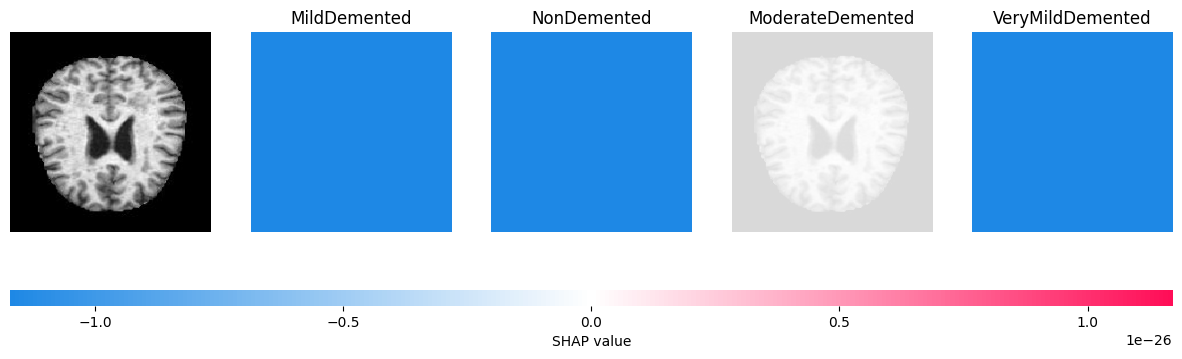

In [ ]:
# output with shap values
shap.image_plot(shap_values[0])

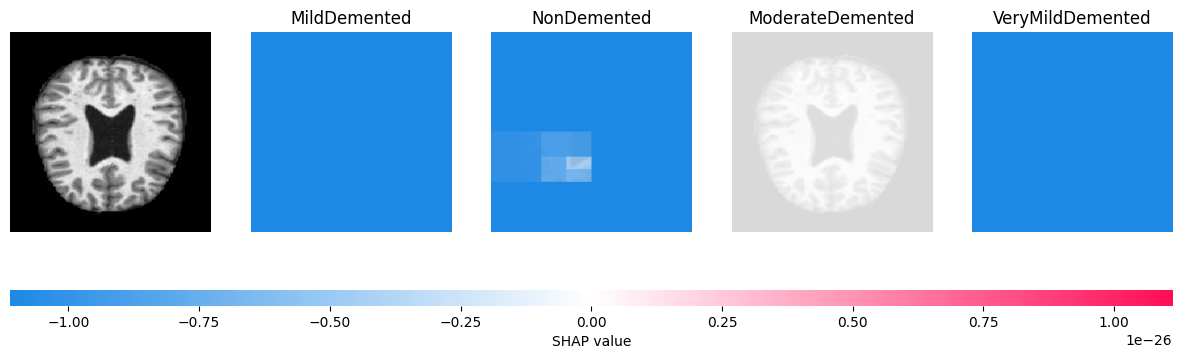

In [ ]:
shap.image_plot(shap_values[1])

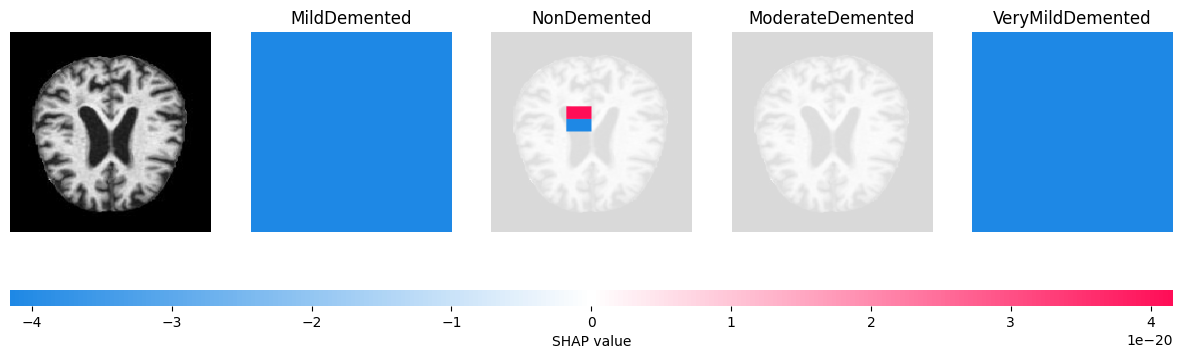

In [ ]:
shap.image_plot(shap_values[2])

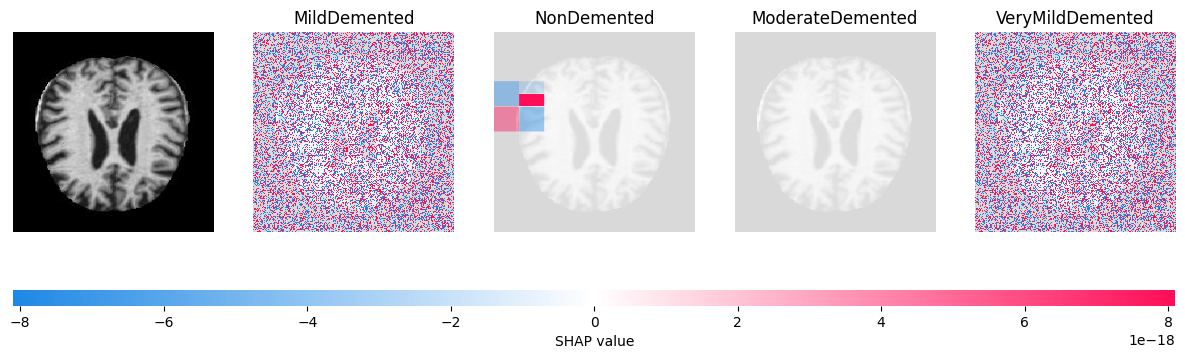

In [ ]:
shap.image_plot(shap_values[3])

In [ ]:
explainer = shap.Explainer(f, masker, output_names=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

shap_values = explainer(X_test[4:8], max_evals=1000, batch_size=50, outputs= shap.Explanation.argsort.flip[:4])


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer:  75%|███████▌  | 3/4 [02:05<00:31, 31.54s/it]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 4/4 [03:08<00:00, 44.47s/it]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [04:10, 62.62s/it]


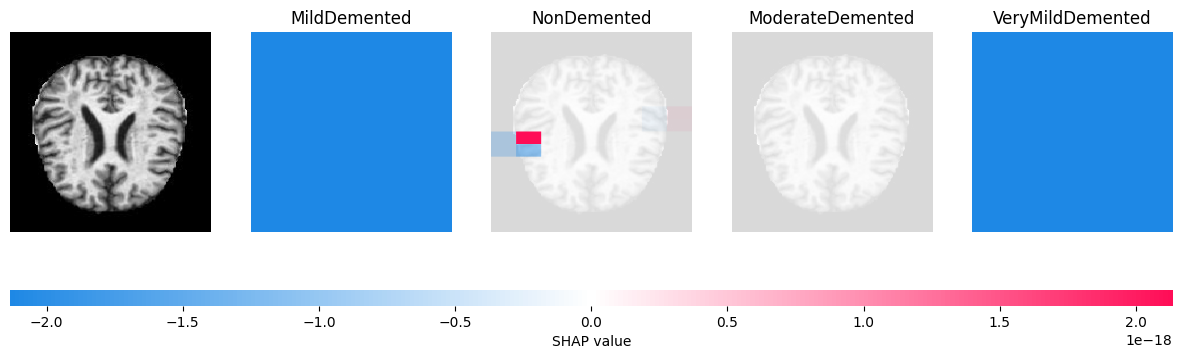

In [ ]:
shap.image_plot(shap_values[0])

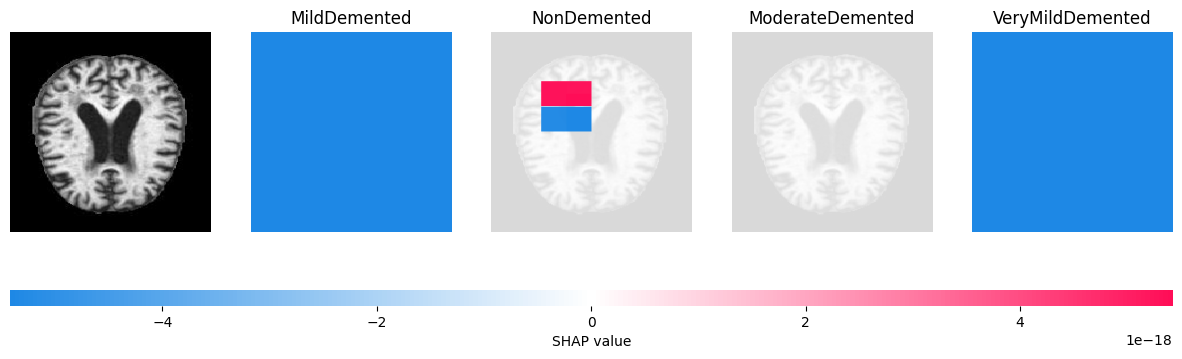

In [ ]:
shap.image_plot(shap_values[1])

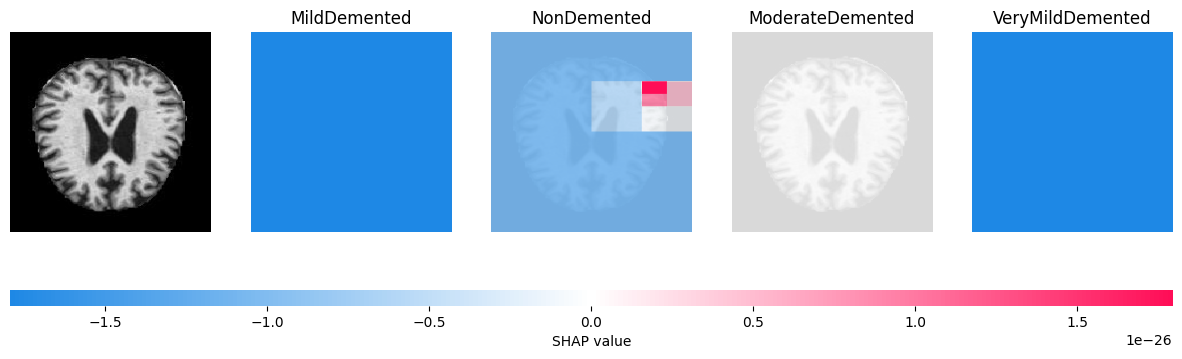

In [ ]:
shap.image_plot(shap_values[2])

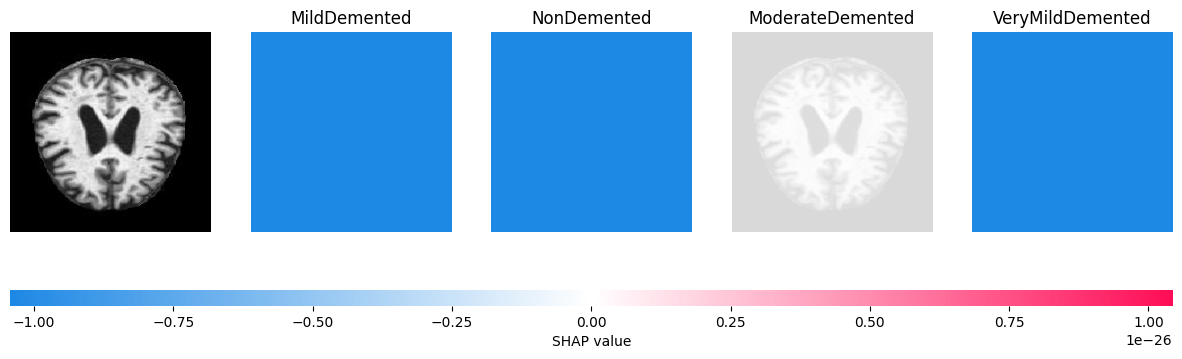

In [ ]:
shap.image_plot(shap_values[3])

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X_test[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

In [ ]:
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine =explainer_blur(X_test[4:8], max_evals=1000, batch_size=50, outputs= shap.Explanation.argsort.flip[:4])

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer:  75%|███████▌  | 3/4 [01:17<00:19, 19.47s/it]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|██████████| 4/4 [01:56<00:00, 27.71s/it]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 5it [02:35, 38.90s/it]


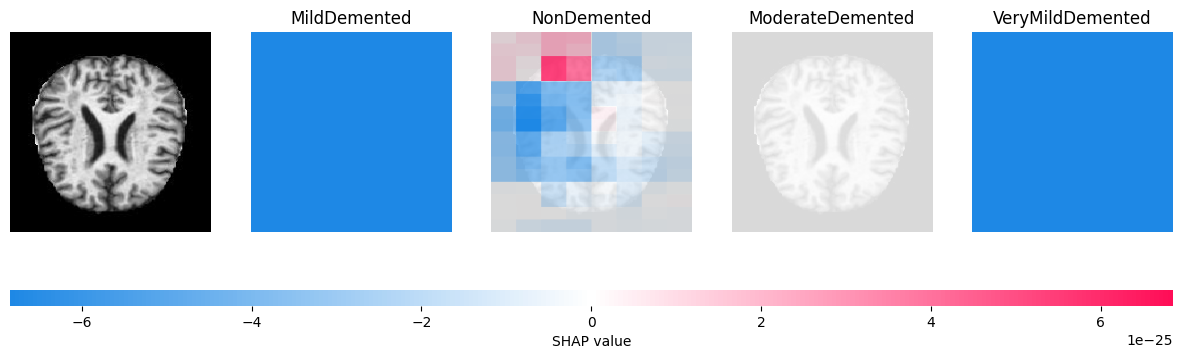

In [ ]:
shap.image_plot(shap_values_fine[0])

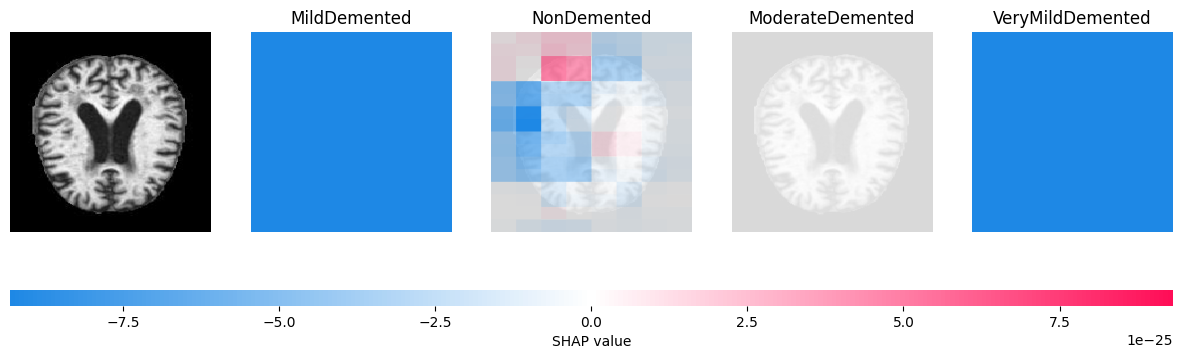

In [ ]:
shap.image_plot(shap_values_fine[1])

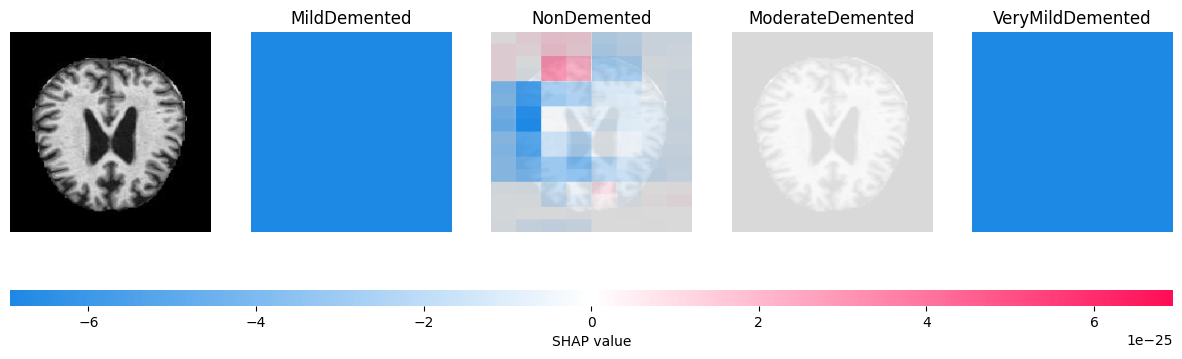

In [ ]:
shap.image_plot(shap_values_fine[2])

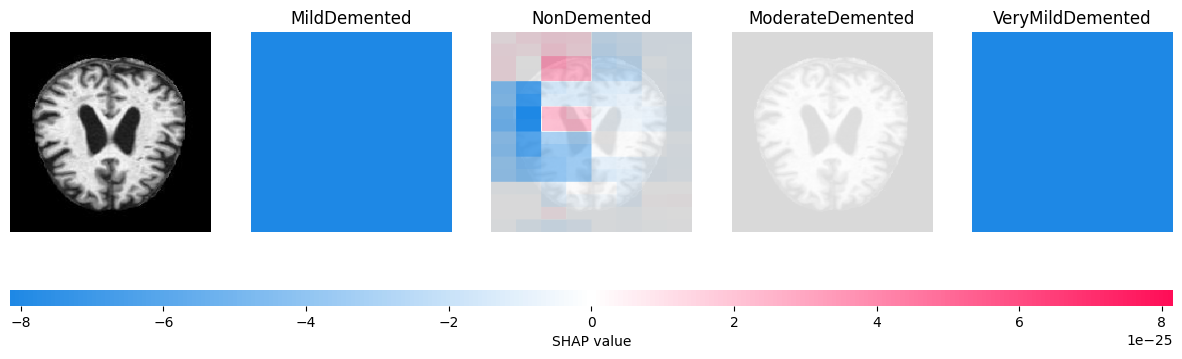

In [ ]:
shap.image_plot(shap_values_fine[3])

In [ ]:
# select a set of background examples to take an expectation over
background = X_test[np.random.choice(X_test.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[0:5])

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


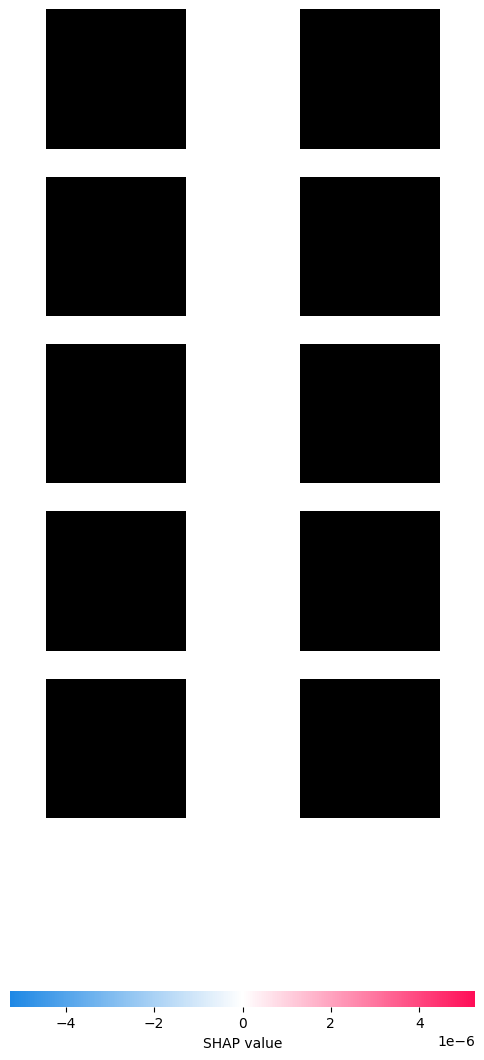

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values,-X_test[:5])

In [ ]:
! pip install lime matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9d8e7d5776b7605663687ebf8e47ebad74c63ea49f3f8ebe2b93d6c65eacab5d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
def predict_function(images):
    # Assuming 'model' is your trained Keras model
    return model.predict(images)

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


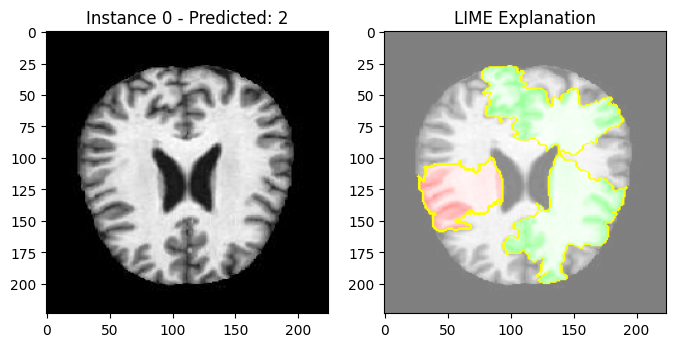

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


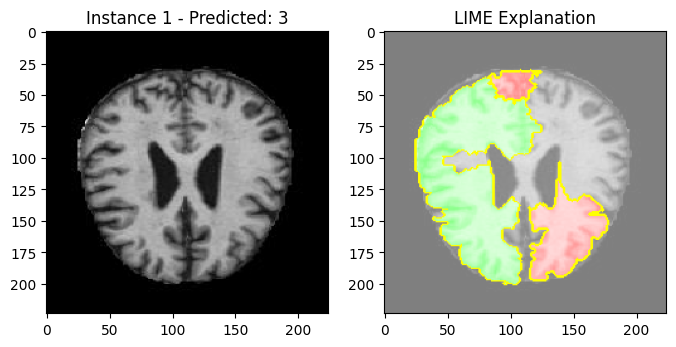

1/1 [==============================] - 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


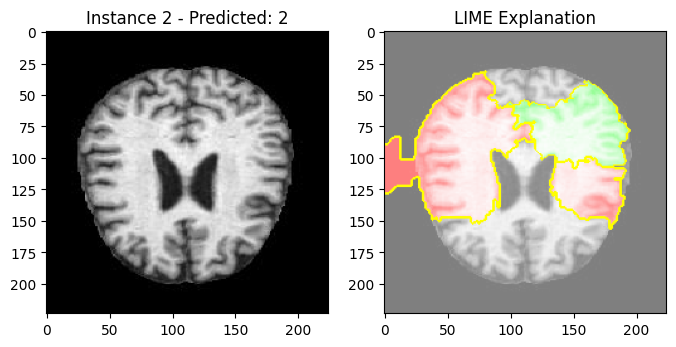

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


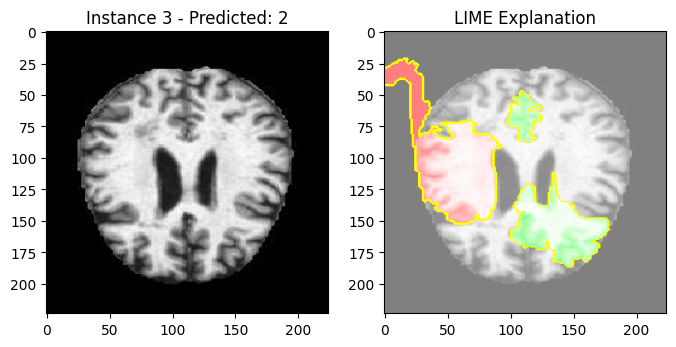

1/1 [==============================] - 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


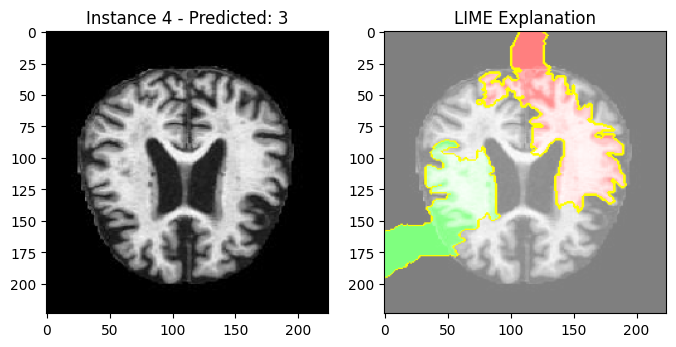

In [ ]:
# Iterate over some instances from X_test
num_instances = 5  # Number of instances to explain
for i in range(num_instances):
    # Choose an instance from X_test
    image = X_test[i]
    # Predict using the model
    pred = np.argmax(predict_function(np.array([image])))

    # Explain the prediction using LIME
    explanation = explainer.explain_instance(image, predict_function, top_labels=1, hide_color=0, num_samples=1000)

    # Get image and mask for the explanation
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

    # Plot original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Instance {i} - Predicted: {class_names[y_pred[i]]}')

    # Plot explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title('LIME Explanation')

    plt.show()

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


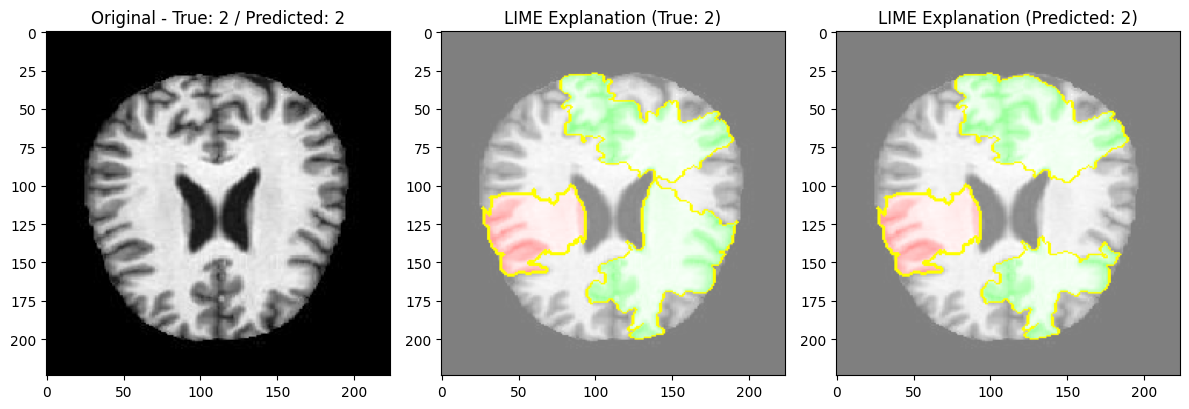

1/1 [==============================] - 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


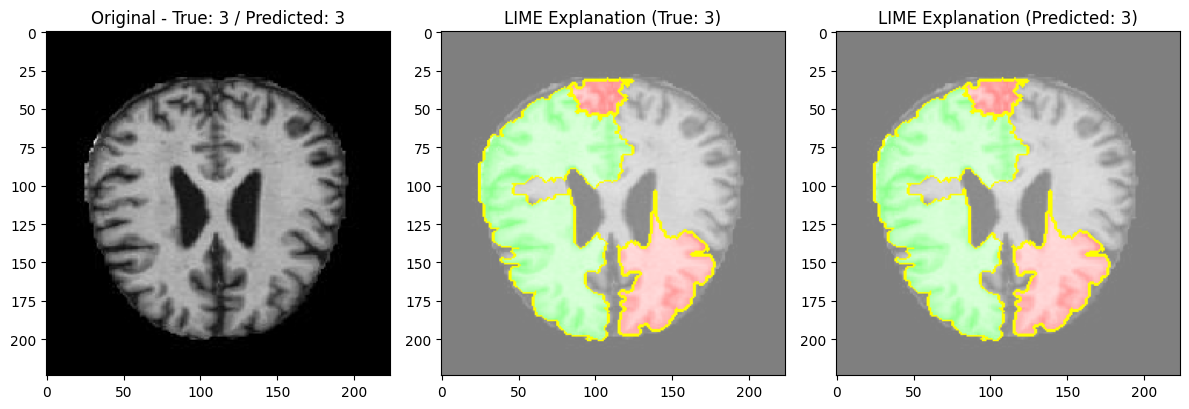

1/1 [==============================] - 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


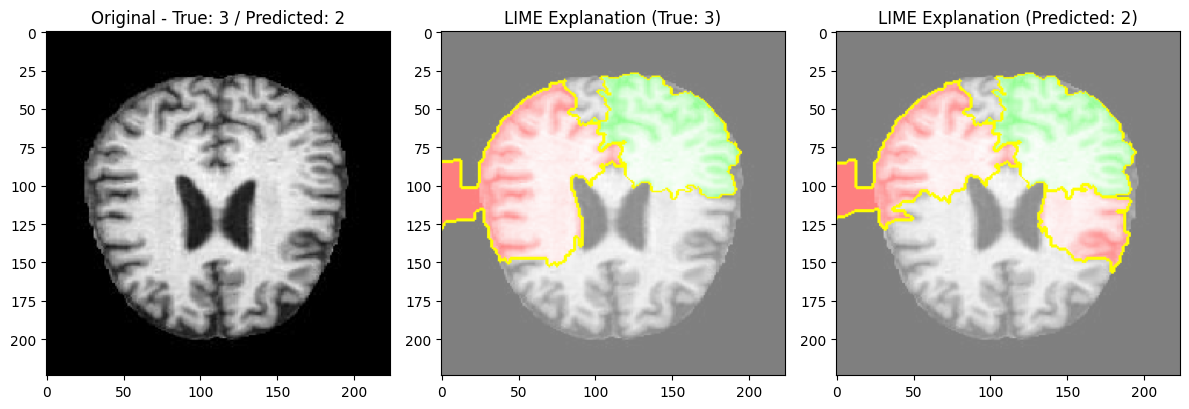

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


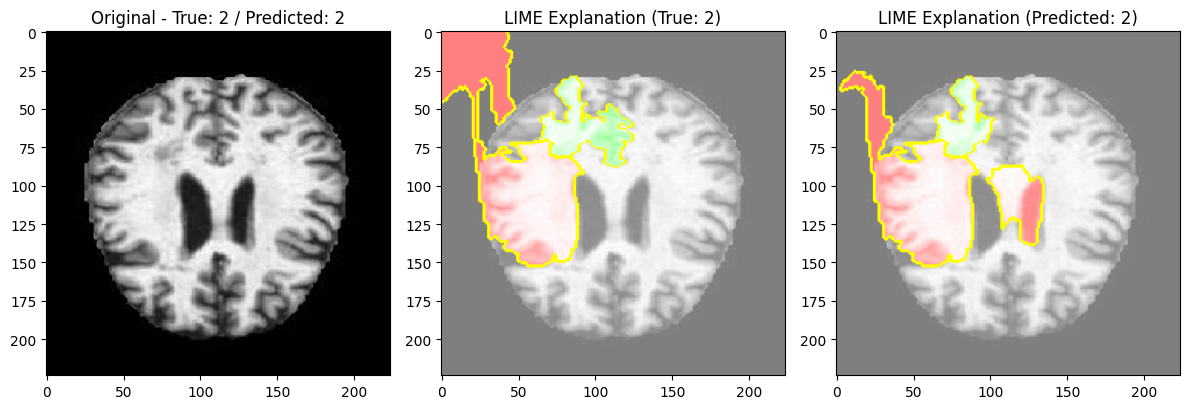

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


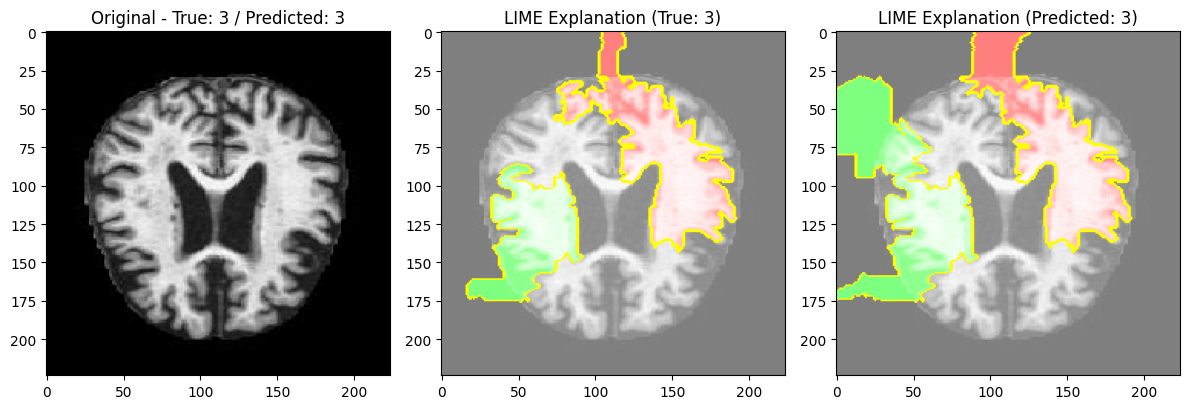

In [ ]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Assuming X_test, y_test_, y_pred, model, class_names, and explainer are defined as before

# Function to predict probabilities using the model
def predict_function(images):
    return model.predict(images)

# Initialize LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Number of instances to explain
num_instances = 5

for i in range(num_instances):
    # Choose an instance from X_test
    image = X_test[i]
    true_label = y_test_[i]
    pred_label = y_pred[i]

    # Predict using the model for the true label
    true_pred = np.argmax(predict_function(np.array([image])))

    # Explain the prediction using LIME for the true label
    explanation_true = explainer.explain_instance(image, predict_function, labels=[true_label], top_labels=1, hide_color=0, num_samples=1000)
    temp_true, mask_true = explanation_true.get_image_and_mask(true_pred, positive_only=False, num_features=5, hide_rest=False)

    # Explain the prediction using LIME for the predicted label
    explanation_pred = explainer.explain_instance(image, predict_function, labels=[pred_label], top_labels=1, hide_color=0, num_samples=1000)
    temp_pred, mask_pred = explanation_pred.get_image_and_mask(pred_label, positive_only=False, num_features=5, hide_rest=False)

    # Plot original image, LIME for true label, and LIME for predicted label
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title(f'Original - True: {class_names[true_label]} / Predicted: {class_names[pred_label]}')

    # LIME explanation for true label
    plt.subplot(1, 3, 2)
    plt.imshow(mark_boundaries(temp_true / 2 + 0.5, mask_true))
    plt.title(f'LIME Explanation (True: {class_names[true_label]})')

    # LIME explanation for predicted label
    plt.subplot(1, 3, 3)
    plt.imshow(mark_boundaries(temp_pred / 2 + 0.5, mask_pred))
    plt.title(f'LIME Explanation (Predicted: {class_names[pred_label]})')

    plt.tight_layout()
    plt.show()


In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Assuming test_dataset, model, and class_name are defined as described

# Load test data
X_test, y_test = next(test_dataset)
y_test_ = np.argmax(y_test, axis=1)

# Reduce batch size for SHAP value calculation
batch_size = 10  # Start with a small batch size
explainer = shap.DeepExplainer(model, data=X_test[:100])

# Calculate SHAP values in batches
shap_values = []
for i in range(0, 100, batch_size):  # Process instances in batches
    shap_values_batch = explainer.shap_values(X_test[i:i+batch_size])
    shap_values.append(shap_values_batch)

# Concatenate SHAP values from batches
shap_values = np.concatenate(shap_values, axis=0)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test[:100], class_names=list(class_name.keys()), plot_type='bar')

# Example of force plot for an individual prediction
idx = 0  # Example instance index
shap.force_plot(explainer.expected_value[class_name[y_test_[idx]]], shap_values[class_name[y_test_[idx]]][idx], X_test[idx])

plt.show()

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
print(class_names)


NameError: name 'class_names' is not defined

In [ ]:
print(shap_values.shape)


(10, 224, 224, 3, 4)


In [ ]:
print(shap_values[0])

[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 ...


 [[[0. 0. 0.

IndexError: list index out of range

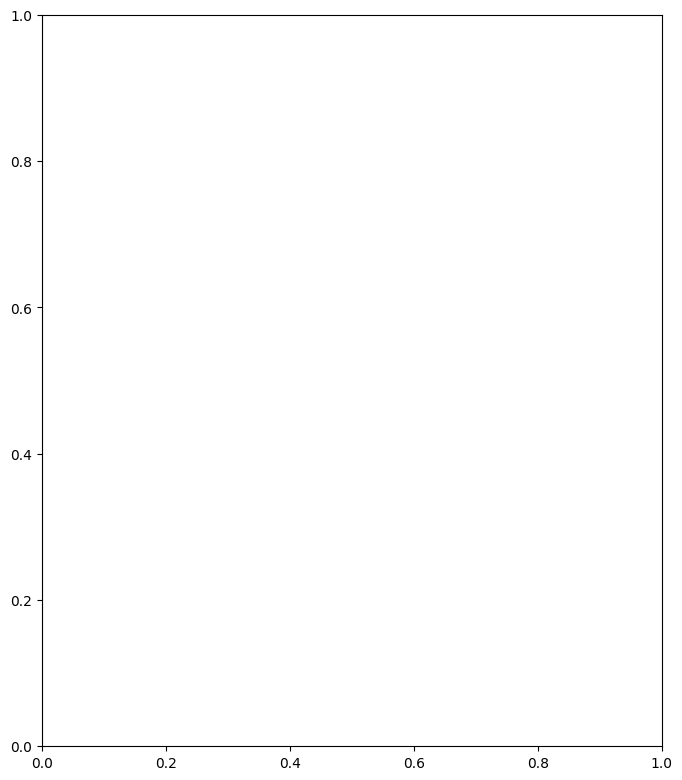

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Assuming test_dataset and model are defined as described

# Load test data
X_test, y_test = next(test_dataset)
y_test_ = np.argmax(y_test, axis=1)

# Define class names
class_name = {'MildDemented': 0,
              'ModerateDemented': 1,
              'NonDemented': 2,
              'VeryMildDemented': 3}

# Initialize SHAP DeepExplainer with a smaller subset
explainer = shap.DeepExplainer(model, data=X_test[:10])  # Adjusted batch size

# Function to calculate SHAP values in smaller batches
def calculate_shap_values(explainer, data, batch_size=10):
    shap_values = []
    for i in range(0, len(data), batch_size):
        batch_data = data[i:i+batch_size]
        shap_values_batch = explainer.shap_values(batch_data)
        shap_values.append(shap_values_batch)
    return [np.concatenate([batch[class_idx] for batch in shap_values], axis=0) for class_idx in range(len(shap_values[0]))]

# Calculate SHAP values for the first 50 instances in batches of 10
shap_values = calculate_shap_values(explainer, X_test[:50], batch_size=10)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test[:50], class_names=list(class_name.keys()), plot_type='bar')

# Example of force plot for an individual prediction
idx = 0  # Example instance index
shap.force_plot(explainer.expected_value[class_name[y_test_[idx]]], shap_values[class_name[y_test_[idx]]][idx], X_test[idx])

plt.show()
